In [202]:
#Question 1 DIAML Assignment3

import numpy as np
from scipy import stats
import pandas as pd
from prettytable import PrettyTable
"""
 - Null hypothesis: The mean of the distribution is 7725 and there's no systematic deviation
 - Alternative hypothesis: There's a systematic deviation and the mean of the distribution is not 7725
 1. A two tailed test will be used.
"""
#Assing the anticipated mean of the distribution to variable u
u = 7725
#Assign the sample size to variable N
N = 11
#Calculate the degree of freedom and assign it to the variable degf
degf = N-1
#Create a dataframe made of 11 observations
sm = pd.Series([5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770])

#Compute the mean of distribution 
x_mean = sm.mean()

#Compute the standard deviation, the second parameter is the delta degree of freedom and it is set to remove the bias in standard deviation computed from a sample of the population
x_std = np.std(sm, ddof=1)

#Compute the standard error of the mean
ste = x_std/np.sqrt(N)

#Compute the t-statistic
t_stat = (x_mean - u) / ste

#Compute the p-value
p_val = 2*(1 - stats.t.cdf(abs(t_stat), df = degf))

print("\nNull hypothesis: The mean of the distribution is 7725 and there's no systematic deviation from the recommended mean\n")
print("\nAlternative hypothesis: There's a systematic deviation from the recommended mean and the mean of the distribution is not 7725. \n")
print("\nForm of Alternative test: A two tailed test\n")

#Create a table using the prettyTable module 
SE_stat_table = PrettyTable(["Metric", "Value"])

#Add rows to the table
SE_stat_table.add_rows([    
    ["Mean", x_mean],
    ["Standard Deviation", x_std],
    ["Standard Error", ste],
    ["t-statistic", t_stat],
    ["Degree of Freedom", degf],
    ["P-value", p_val]
])
#Set the title of the table
SE_stat_table.title = "Hypothesis testing of the t-distribution"
#Print the table to the console
print(SE_stat_table)
#Print the conclusion of the hypothesis test
print("\nSince the p-value is less than the significance level (0.05), the probability of the mean of the distribution being 7725 is close to 0 hence the null hypothesis can be rejected")



Null hypothesis: The mean of the distribution is 7725 and there's no systematic deviation from the recommended mean


Alternative hypothesis: There's a systematic deviation from the recommended mean and the mean of the distribution is not 7725. 


Form of Alternative test: A two tailed test

+------------------------------------------+
| Hypothesis testing of the t-distribution |
+--------------------+---------------------+
|       Metric       |        Value        |
+--------------------+---------------------+
|        Mean        |  6753.636363636364  |
| Standard Deviation |  1142.1232221373727 |
|   Standard Error   |  344.3631083801271  |
|    t-statistic     | -2.8207540608310198 |
| Degree of Freedom  |          10         |
|      P-value       | 0.01813723517610577 |
+--------------------+---------------------+

Since the p-value is less than the significance level (0.05), the probability of the mean of the distribution being 7725 is close to 0 hence the null hypothesis can 

Question 2 DIAML Assignment3

In [162]:
#Import the stats submodule of scipy
from scipy import stats
import math
#Assign the size of sample 1 to variable N1
N1 = 42

#Assign the size of sample 2 to variable N2
N2 = 61

#Assign the mean of sample 1 to variable x1
x1 = 74

#Assign the mean of sample 2 to variable x2
x2 = 57

#Assign the Standard deviation of sample 1 to variable s1
s1 = 7.4

#Assign the Standard deviation of sample 2 to variable s2
s2 = 7.1

#Calculate the variance of the distribution and assign it to r1
r1 = math.pow(s1, 2)
#Calculate the variance of the distribution and assign it to r2
r2 = math.pow(s2, 2)

# sD = math.sqrt((r1/N1) + (r2/N2))

# t = (x1-x2) / sD

#Calculate the degree of freedom using the Welch-Satterthwaite equation
dof = math.pow((r1/N1) + (r2/N2), 2) / (
    
    ((r1/N1)**2 / (N1 - 1)) + ((r2/N2)**2 / (N2 - 1))
    
    )

#print the degree of freedom to the console
print("\nNull Hypothesis: The difference between the two distribution means is due to random variation\n\t\tand is not",  
      "significant hence the pints in Irish pubs have similar test to pints served elsewhere.\n")

print("\nAlternative Hypothesis: The difference between the two distribution means is significant hence the pints in Irish pubs taste differently from pints served elsewhere. \n")
print("\nType of t-test used: Two-sample t-test\n")
print("\nForm of alternative test: Two-tailed test\n")
print(f"\nDegree of freedom = {dof}\n")
#calculate the degree of freedom using the stats submodule that takes the means, standard deviations, and sample sizes of the two samples as parameter
t_stats, p_vals = stats.ttest_ind_from_stats(mean1=x1, std1=s1, nobs1=N1,
                                            mean2=x2, std2=s2, nobs2=N2)

# Print the t-statistics to console
print("\nt-statistic = " + str(t_stats), end="\n")  
# Print the p-value to console
print("\np-value = " , round(p_vals, 2), end="\n")

print("\nBased on the p-value obtained less than 0.05, we reject the hypothesis that The difference between the two distribution means is due to random variation\nand is not",  
      "significant. Therefore the means of the two populations are different.")


Null Hypothesis: The difference between the two distribution means is due to random variation
		and is not significant hence the pints in Irish pubs have similar test to pints served elsewhere.


Alternative Hypothesis: The difference between the two distribution means is significant hence the pints in Irish pubs taste differently from pints served elsewhere. 


Type of t-test used: Two-sample t-test


Form of alternative test: Two-tailed test


Degree of freedom = 85.87168862441837


t-statistic = 11.73775770205081

p-value =  0.0

Based on the p-value obtained less than 0.05, we reject the hypothesis that The difference between the two distribution means is due to random variation
and is not significant. Therefore the means of the two populations are different.


Question 3 DIAML Assignment3

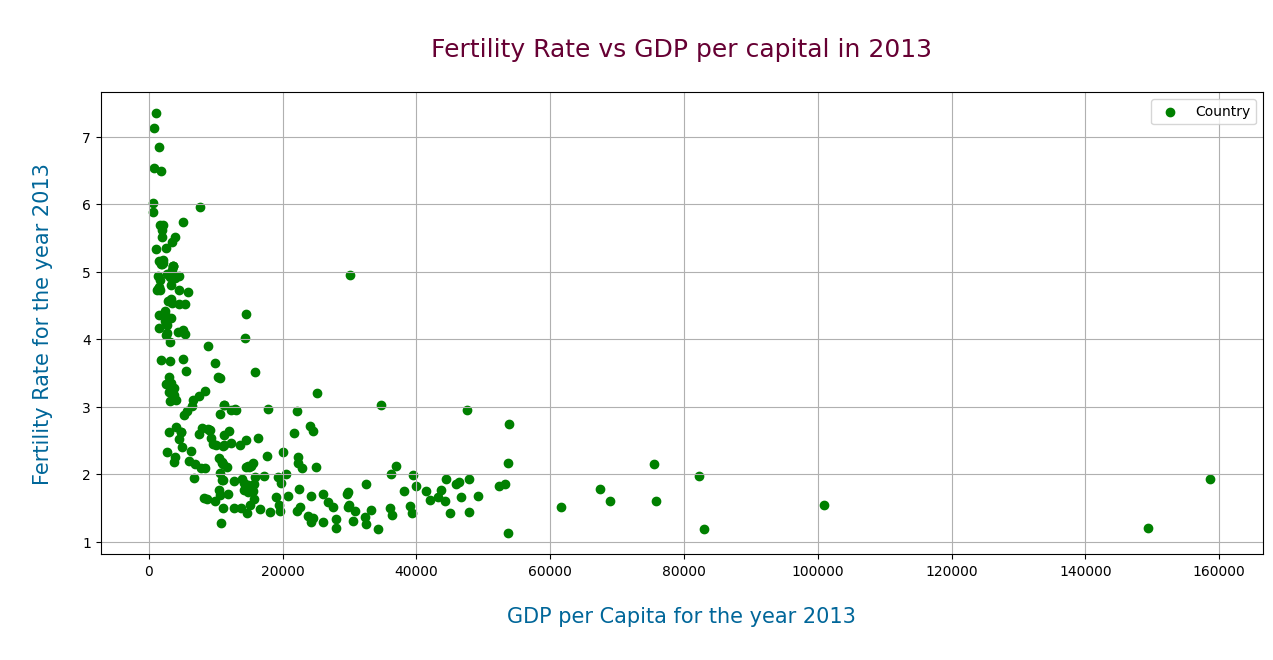

The correlation coefficient is -0.5150224715836508


In [207]:
import pandas as pd
import matplotlib.pyplot as plt

#Read the csv dataset for GDP per capita from the world bank indicators
GDP = pd.read_csv("API_NY.GDP.PCAP.PP.CD_DS2_en_csv_v2_5871590.csv", skiprows=4)
#Read the csv dataset for fertility rate from the world bank indicators
FRTLT = pd.read_csv("API_SP.DYN.TFRT.IN_DS2_en_csv_v2_5871756.csv", skiprows=4)
#Drop the unlabelled column at index 67 since it can potentially cause runtime errors
GDP = GDP.drop(columns=['Unnamed: 67'])
#Drop the unlabelled column at index 67 since it can potentially cause runtime errors
FRTLT = FRTLT.drop(columns=['Unnamed: 67'])

#Extract the GDP per Capita for the year 2013
GDP_2013 = GDP['2013']

#Extract the fertility rate for the year 2013 
FRTLTY_2013 = FRTLT['2013']

#Set the height and width of the graph 
plt.figure(figsize=(15, 6))

#Set the font color and style of the graph title 
titleFont = {'color':'#660033','size':18, 'family':'sans-serif'}
#Set the font color and style of the graph labels 
labelsFont = {'color':'#006699','size':15, 'family':'sans-serif'}
#Set the grid for the graph
plt.grid()
#Set the title of the scatter plot
plt.title("\nFertility Rate vs GDP per capital in 2013\n", fontdict = titleFont)
#Set the label of the scatter plot on x-axis
plt.xlabel("\nGDP per Capita for the year 2013\n", fontdict = labelsFont) 
#Set the label of the scatter plot on y-axis
plt.ylabel("\nFertility Rate for the year 2013\n", fontdict = labelsFont)
#Plot the scatter plot showing the Fertility rate against the GDP per capita
plt.scatter(GDP_2013, FRTLTY_2013, c='green', label='Country')
#Display the graph labels using the legend
plt.legend()
#Display the graph
plt.show()
#Calculate the correlation coefficient using the .corr function.
cor = GDP_2013.corr(FRTLTY_2013)
cor2 = FRTLTY_2013.corr(GDP_2013)
print(f"The correlation coefficient is {cor}")


Question 4 DIAML Assignment3

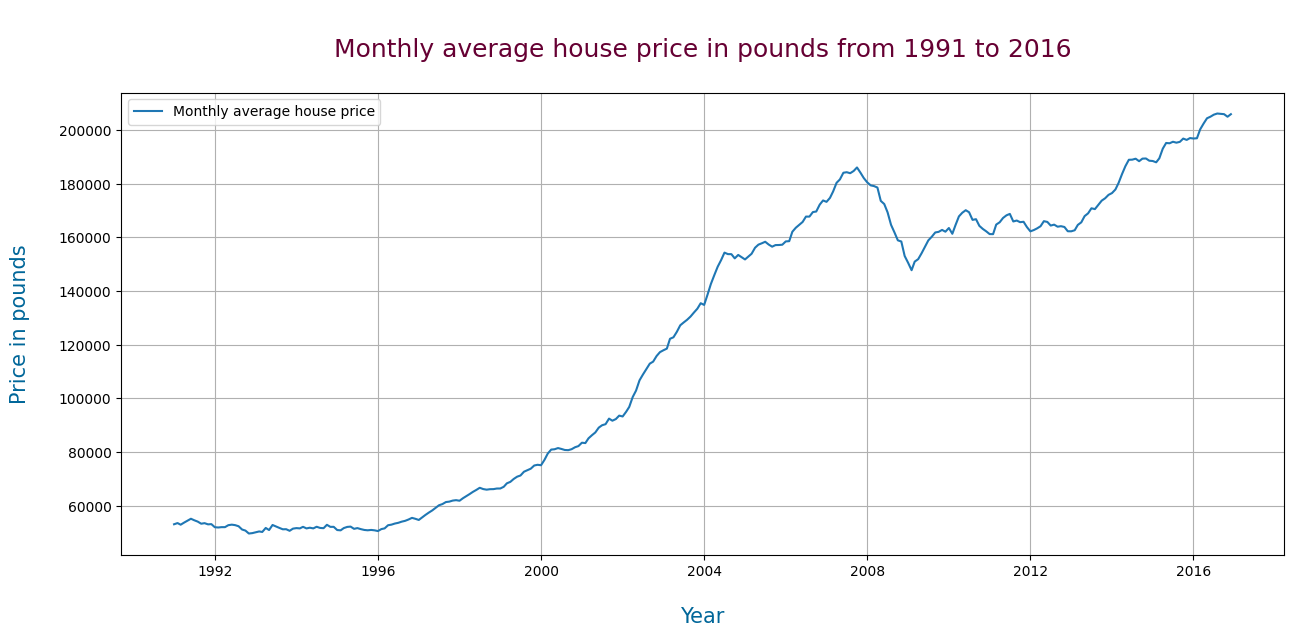

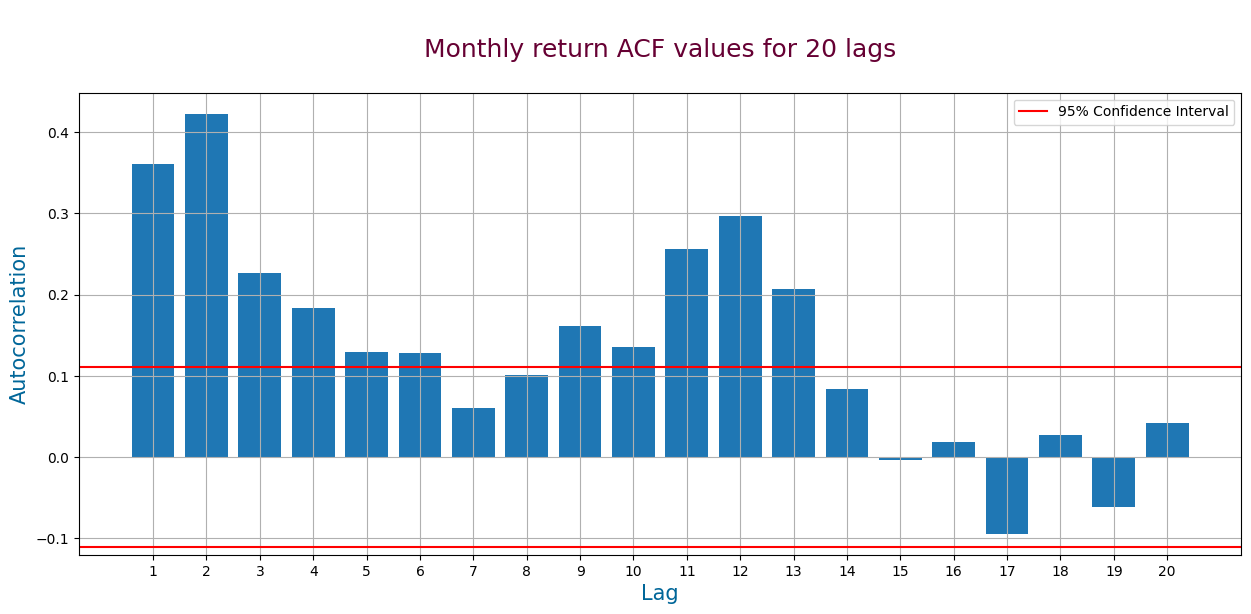

The annualized return from 1991 to 2016 = 5.35 %


In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

#Read the House renting dataset using pandas, setting the date column as the index of the dataset 
Hprice = pd.read_excel("Monthly Average House Price.xls", parse_dates=True, index_col="Unnamed: 0")

#Extract the records dating from 1991 to 2016 inclusive
Hprice_91_16 = Hprice[(Hprice.index.year >=1991) & (Hprice.index.year < 2017)]

#Assign the dates column to a pandas series
x = Hprice_91_16.index
#Assign the Average House Prices to a pandas series
y = Hprice_91_16['Average House Price']

#Set the font color and style of the graph title
titleFont = {'color':'#660033','size':18, 'family':'sans-serif'}

#Set the font color and style of the graph labels
labelsFont = {'color':'#006699','size':15, 'family':'sans-serif'}

#Set the height and width of the graph
plt.figure(figsize=(15, 6))

#Set the title of the line graph
plt.title("\nMonthly average house price in pounds from 1991 to 2016\n", fontdict = titleFont)

#Set the label of the scatter plot on x-axis
plt.xlabel("\nYear", fontdict = labelsFont)

#Set the label of the scatter plot on y-axis
plt.ylabel("Price in pounds\n", fontdict = labelsFont)

#Set the grid of the line graph
plt.grid()

#Plot the line graph of house pricing against the dates
plt.plot(x, y, label='Monthly average house price')

#Display the line graph 
plt.legend()
plt.show()

#Create a list of monthly returns of house prices
m_return = []

#This loop iterates throughout the house pricing and assigns a monthly return to the m_return list
for i in range(1, len(y)):
    #assign the current month Price to a variable
    currentPrice = y.iloc[i]
    #assign the previous month Price to a variable
    prevPrice = y.iloc[i-1]
    #Calculate the return value using the given formula
    returnVal = (currentPrice / prevPrice) - 1
    #append the monthly return to the list
    m_return.append(returnVal*100)

#calculate the Autocorrelation at different time lags
ACF = sm.tsa.acf(m_return, nlags=20)

#Set the size of the graph 
plt.figure(figsize=(15, 6))

#Set the title of the bar graph
plt.title("\nMonthly return ACF values for 20 lags\n", fontdict = titleFont)

#Set the label of the scatter plot on x-axis
plt.xlabel("Lag", fontdict = labelsFont)

#Set the label of the scatter plot on y-axis
plt.ylabel("Autocorrelation", fontdict = labelsFont)

#Create an array of values from 1 to 20 to serve as lags
lags = np.arange(1, 21)

#Plot the bar graph of autocorrelation against lags
plt.bar(lags, ACF[1:])

#Calculate the length of monthly returns 
n = len(m_return)
#Calculate the standard error of the mean
stderr = 1/ np.sqrt(n)
#Calculate the upper limit of the ACF value that would lead to a statistically significant result
upper = 1.96 * stderr

#Calculate the lower limit of the ACF value that would lead to a statistically significant result
lower = - 1.96 * stderr

#Plot a horizontal line to show the lower limit
plt.axhline(y=lower, color="red")

#Plot a horizontal line to show the upper limit
plt.axhline(y=upper, color="red", label='95% Confidence Interval')

# Set the scale of the x-axis to range from 1 to 20 by one unit
plt.xticks(range(1, 21))

#Set the grid of the bar graph
plt.grid()

#Display the labels of the graph using a legend
plt.legend()

#Display the bar graph
plt.show()

"""
When trends are present in a time series, shorter lags typically have large positive correlations because observations closer in time tend to have similar values. 
The correlations taper off slowly as the lags increase.
"""

"""
When seasonal patterns are present, the autocorrelations are larger for lags at multiples of the seasonal frequency than for other lags. There's a seasonality since 
at the first three lags, the seasonality is highest and there's repetition of patterns a different lags.
"""
#Create a list that will hold the cumulative monthly returns 
cumulative_returns = 1

#This loop iterates through all returns and appends the cumulative returns to the list
for ret in m_return:
     #appends the cumulative returns to the list
     cumulative_returns *= (ret/100 + 1)

#Calculate the annualized return and assign it to the variable
annual_return = (cumulative_returns ** (1/26) - 1) * 100

#Print the result to the console and round the answer off to two decimal values
print(f"The annualized return from 1991 to 2016 = {round(annual_return, 2)} %")


Question 5 DIAML Assignment3

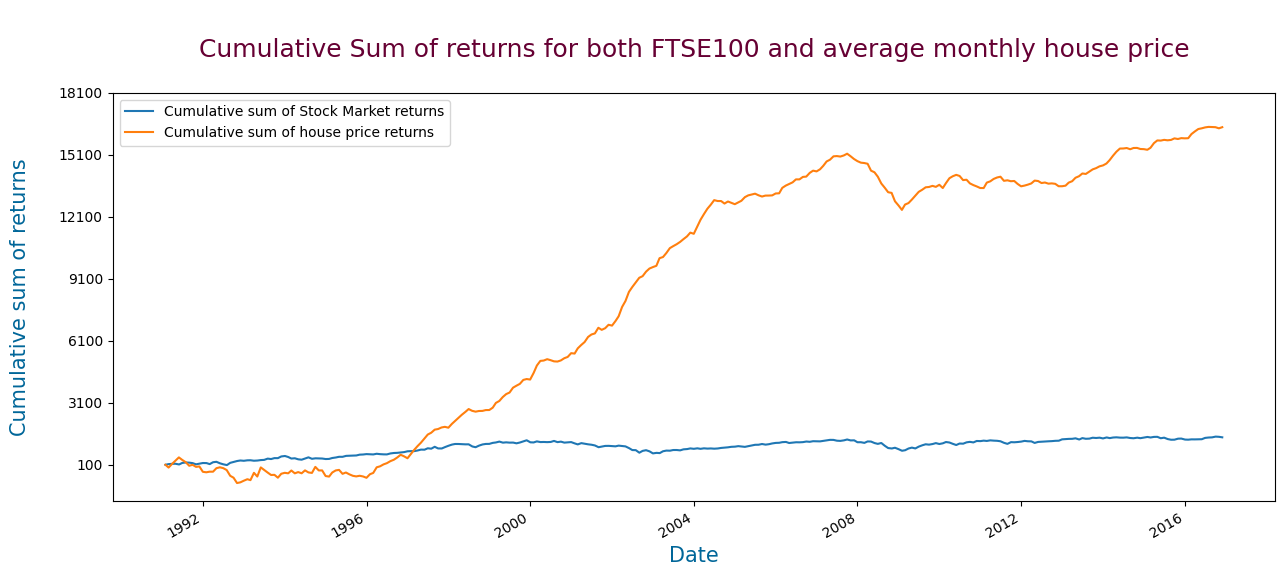

The annualized return for stock market from 1991 to 2016 = 4.46
The annualized return for average house prices from 1991 to 2016 = 5.35


In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Read the stocks market dataset, setting the date timestamps as the index of the dataset
FTS = pd.read_csv('FTSE100.csv', parse_dates=True, index_col="Date")

#Filter the dataset to remain with only dates from 1991 to 2016
FTS_91_16 = FTS[(FTS.index.year >=1991) & (FTS.index.year < 2017)]
#Sort the dataset to reorder the dates in ascending order of events
FTS_91_16 = FTS_91_16.sort_index(ascending=True)
#Extract the Adj Clode column into a pandas series
adjClose = FTS_91_16['Adj Close']

#Calculate the monthly returns of the stock markets
adjClose_returns = adjClose.pct_change()

#Exclude the first cell of the stock market series since it is null
adjClose_returns = adjClose_returns[1:]

#Save the first values of the stock market before synchronizing it to start at 100
temp1 = adjClose_returns.iloc[0]

#Synchronize the stock markets series by multiplying it by the first cell value times a hundred
adjClose_returns = adjClose_returns * (100 / adjClose_returns.iloc[0])

#Use the pandas library's cumsum function to calculate the cumulative sum of stock market returns
cum_sum_adjClose_return = adjClose_returns.cumsum(axis=0)

#Read the monthly average house price dataset, setting the date timestamps as the index of the dataset
Hprice = pd.read_excel("Monthly Average House Price.xls", parse_dates=True, index_col="Unnamed: 0")

#Filter the dataset to remain with only dates from 1991 to 2016
Hprice_91_16 = Hprice[(Hprice.index.year >=1991) & (Hprice.index.year < 2017)]

#Extract the monthly house price column 
AvgHPrice = Hprice_91_16['Average House Price']
#print(AvgHPrice)
#Calculate the monthly returns of the house prices
monthly_ret = AvgHPrice.pct_change()

#Exclude the first cell of the monthly returns series since it is null
monthly_ret = monthly_ret[1:]
#Save the first values of the monthly return before synchronizing it to start at 100
temp2 = monthly_ret.iloc[0]

#Synchronize the house price series by multiplying it by the first cell value times a hundred
monthly_ret = monthly_ret * (100 / monthly_ret.iloc[0])

#Use the pandas library's cumsum function to calculate the cumulative sum of house price returns
cum_sum_monthly_ret = monthly_ret.cumsum(axis=0)

x = cum_sum_adjClose_return
y = cum_sum_monthly_ret

#assign the timestamp indices of the dataset to a list
z = Hprice_91_16.index
# print()
#Set the font color and style of the graph title
titleFont = {'color':'#660033','size':18, 'family':'sans-serif'}
#Set the font color and style of the graph labels
labelsFont = {'color':'#006699','size':15, 'family':'sans-serif'}
#Set the figure size
plt.figure(figsize=(15, 6))
#Set the graph title
plt.title("\nCumulative Sum of returns for both FTSE100 and average monthly house price\n", fontdict = titleFont)
#Set the x-axis label
plt.xlabel("\nDate", fontdict = labelsFont)
#Set the y-axis label
plt.ylabel("Cumulative sum of returns\n", fontdict = labelsFont)
#Set the grid
plt.grid()

#plot the stock market returns cumulative sum
x.plot(label='Cumulative sum of Stock Market returns')

#plot the house price returns cumulative sum
y.plot(label='Cumulative sum of house price returns')

#Display the labels
plt.legend()

#Scale the y-axis to start from 100
plt.yticks(range(100, 20000, 3000))

#Display the graph
plt.show()

sm_cumulative_returns = 1
#This loop calculated the annualized return for the Stock market
for ret in adjClose_returns:
     sm_cumulative_returns *= (ret/100*temp1 + 1)
sm_annual_return = (sm_cumulative_returns ** (1/26) - 1) * 100
print(f"The annualized return for stock market from 1991 to 2016 = {round(sm_annual_return, 2)} %")

cumulative_returns = 1

#This loop calculated the annualized return for the house price
for ret in monthly_ret:
     cumulative_returns *= (ret/100*temp2 + 1)
annual_return = (cumulative_returns ** (1/26) - 1) * 100
print(f"The annualized return for average house prices from 1991 to 2016 = {round(annual_return, 2)} %")

